# PCA 觀念與推導

> 找到另外不同的係數作為基底向量，將原資料做投影後，使得各個sample間有最大差異量


## 問題描述

假設今天拿到了一些數據，這個數據以一個矩陣的方式記錄資訊，這個矩陣的row代表了不同受測對象，column代表了不同的特徵或者量測值，而row方向的長度是m，而column方向的長度是n，所以這是個$m\times n$的矩陣(matrix)

$$Data=
\left[
  \begin{matrix}
   x_{11} & x_{12} \cdots & x_{1n} \\
   x_{21} & \cdots & \cdots \\
   \cdots & \cdots & \cdots \\
   x_{m1} & \cdots & x_{mn}
  \end{matrix} 
  \right]\tag{1}
$$

舉例來說，假設有m個受測者，每個人都針對身高體重等**特徵**做量測，每個人紀錄了n個特徵

但是當特徵太過於龐大且又可能有關聯時，往往會希望能萃取出一些特徵達到維度降低的目的，畢竟如果特徵數太多，但是受測者不夠多，在分類或回歸上可能會產生不好的效果。

有沒有辦法把$x_k=[x_{k1},x_{k2},\cdots,x_{kn}]$轉成$z_k=[z_{k1},z_{k2},\cdots,z_{kn}]$，使得這k個受測者間有最大差異(maximum variance)


## 目的

現在的目的如下

1. **希望將原始的n個特徵經過線性組合，找到新的特徵**，第k個受測者特徵轉換後的特徵如下：

$$z_k= a_1y_{k,1}+\cdots a_ny_{k,i=n}={\bf{a}^Ty_k},\;k=1\sim m\tag{2}$$


$$y_{ki}=\frac{x_{ki}-\bar{x_i}}{\sigma_i}$$

意思是把每個原始的量測值扣掉其平均後，再除以標準差，來達到***標準化***差異量的目的，同時也有以下效果

$$\Sigma^m_{k=1}{y_{ki}}=0,\;$$

$$\bar{y_i}=0$$

$$\bar{z}=a_1\bar{y}_1+a_2\bar{y}_2+\cdots + a_n\bar{y}_n=0$$

2. **$Var(z_k)$ 有最大值**

接著按照變異數的計算方法將上式展開

$$Var(z_k)=\frac{{\Sigma^m_{k=1}({z_k-\bar{z}})^2}}{m-1}=\frac{\Sigma^m_{k=1}{z_k}^2}{m-1}=\frac{\Sigma^m_{k=1}{(\bf{a}^Ty_k)}^2}{m-1}$$


$$=\frac{\Sigma^m_{k=1}{(\bf{y}^T_ka)(a^Ty_k)}}{m-1}=\frac{\Sigma^m_{k=1}{(\bf{a}^Ty_k)(y^T_ka)}}{m-1}=\frac{{\bf{a}^TB^TBa}}{m-1}$$


$$={\bf{a}^T\rho a}\tag{3}$$

$$B=\left[
  \begin{matrix}
   y_{11} & y_{12} \cdots & y_{1n} \\
   y_{21} & \cdots & \cdots \\
   \cdots & \cdots & \cdots \\
   y_{m1} & \cdots & y_{mn}
  \end{matrix} 
  \right]=
  \left[
  \begin{matrix}
   y_{k=1} \\
   y_{k=2} \\
   \cdots \\
   y_{k=m}
  \end{matrix} 
  \right]$$


$$where\; \rho=
\left[
  \begin{matrix}
   \rho_{11} & \cdots & \rho_{1n} \\
   \rho_{21} & \cdots & \cdots \\
   \cdots & \cdots & \cdots \\
   \rho_{n1} & \cdots & \rho_{nn}
  \end{matrix} 
  \right]=\frac{1}{m-1}B^TB$$

$$\rho_{ij} =\frac{\Sigma^m_{k=1}{[(x_{ki}-\bar{x}_i)(x_{kj}-\bar{x}_j)}]}{\sqrt{\Sigma^m_{k=1}(x_{ki}-\bar{x}_i)^2}\sqrt{\Sigma^m_{k=1}(x_{kj}-\bar{x}_j)^2}}$$

到此，問題變成找能使$\bf{a}^T\rho \bf{a}$產生最大值的$\bf{a}$，而這個$\bf{a}$可以視為一個基底向量，也就是有以下限制

$${\bf{a}^T\bf{a}}=1\tag{4}$$

故變成找以下的最大值

$$\frac{\bf{a}^T\rho \bf{a}}{\bf{a}^T\bf{a}}\tag{5}$$

由**Rayleigh Quotient**可知，由於$\rho$是一個symmetric和positive semidefinite的矩陣，要使得上式產生最大值的$\bf{a}$，就是最大的eigenvalue($\lambda_1$)所對應到的eigenvector($\bf{e_1}$)

第二大的就是第二大的eigenvalue($\lambda_2$)所對應到的eigenvector($\bf{e_2}$)，依此類推。

第k個受測者，第一個主成份($PCA_1$)是用第一個eigenvecor當基底對原始數據做linear combination後的結果

$${\bf{z_k}=e^T_1\bf{y}}=e_{11}y_{k1}+e_{12}y_{k2}+\cdots+e_{1n}y_{kn}$$

結果：

1. 從變數間，找n個長度為1(${\bf{e^T_ie_i}}=1$)的基底${\bf{e_i}}$(n維)，這些$e_i$彼此互相正交(Orthonormal)

2. 最大的eigenvalue所對應到的eigenvector($e_1$)就是能使轉換過後的特徵，產生最大差異的基底。

3. 每個component($e_i$)**能解釋的變異數**比例為$$\frac{\lambda_i}{\Sigma^n_{j=1}(\lambda_j)}$$

## 實作

In [110]:
# import required library
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [111]:
iris=load_iris()
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
target=iris.target

In [112]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [113]:
print("shape = ",df.shape)

shape =  (150, 4)


In [114]:
#ref url:https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
#ref url:https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
np.set_printoptions(precision=3)# set precision

df=StandardScaler().fit_transform(df)#z = (x - u) / s
pca=PCA(n_components=4)
pca.fit(df)
print("explained_variance_ratio_ '(%)'= ")
variance_ratio=pca.explained_variance_ratio_
variance_ratio=variance_ratio*100
print(variance_ratio)
print()
print("cumulation of each component=")
print(np.cumsum(variance_ratio))

print()
#由此可看出，其實第一個主成份(eigenvecctor 1 and eigenvalue 1)就可以解釋變異的95.8%
#從計算結果可以認為，採用兩個主成份來描述資料就可以了
print("由此可看出，其實第一個主成份(eigenvecctor 1 and eigenvalue 1)就可以解釋變異的95.8%")
print("從計算結果可以認為，採用2個主成份來描述資料就可以了")

explained_variance_ratio_ '(%)'= 
[72.962 22.851  3.669  0.518]

cumulation of each component=
[ 72.962  95.813  99.482 100.   ]

由此可看出，其實第一個主成份(eigenvecctor 1 and eigenvalue 1)就可以解釋變異的95.8%
從計算結果可以認為，採用2個主成份來描述資料就可以了


shape of transformed_data =  (150, 2)

由scatter plot 可以看出，經過PCA的轉換後，分類上已經很明顯的


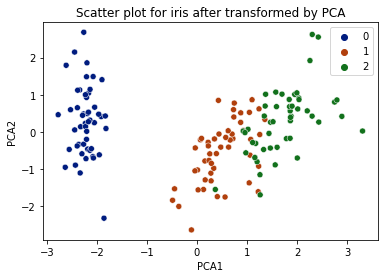

In [115]:
pca=PCA(n_components=2)
pca.fit(df)
transformed_data=pca.transform(df)
print("shape of transformed_data = ",transformed_data.shape)
print()
ax=sns.scatterplot(x=transformed_data[:,0],y=transformed_data[:,1],hue=iris.target,palette="dark",alpha=1)
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_title("Scatter plot for iris after transformed by PCA")
print("由scatter plot 可以看出，經過PCA的轉換後，分類上已經很明顯的")